# Analyzing and Visualizing Movie Ratings
### A Hex Softwares Internship project by Sarvamm
---

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
dir  = "C:/Users/Sarvamm/Documents/Datasets/movies.csv"
df = pd.read_csv(dir)

In [303]:
df.shape

(1000, 12)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [307]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Cleaning Data

In [309]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [311]:
df.dropna(inplace=True)  


In [314]:
print(df.duplicated().any())

False


---

## Rating, Revenue and Popularity Insights

### Top Rated movies and Mean, Median, Mode of ratings

In [319]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [321]:
top10r = df.nlargest(10, 'Rating')[['Title', 'Director', 'Rating']]\
.set_index('Title')
top10r

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5
Whiplash,Damien Chazelle,8.5


### Top 10 Movies

<Axes: xlabel='Rating', ylabel='Title'>

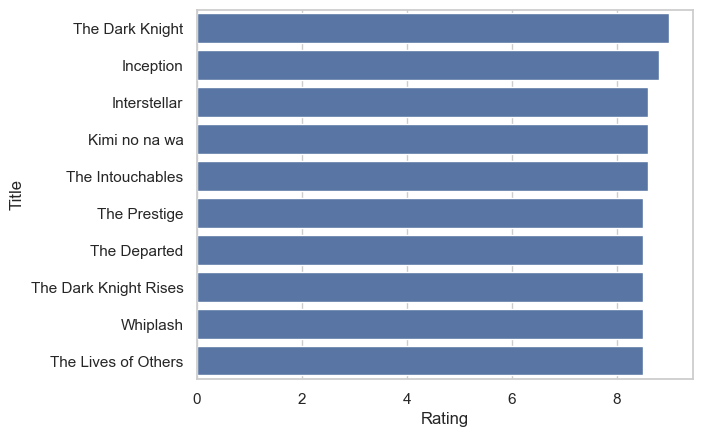

In [324]:
sns.barplot(x = 'Rating' , y = top10r.index, data = top10r)

In [325]:
mean_rating = df['Rating'].mean()
print(f"Mean Rating: {mean_rating:.2f}")
median_rating = df['Rating'].median()
print(f"Median Rating: {median_rating:.2f}")
mode_rating = df['Rating'].mode().iloc[0]
print(f"Mode Rating: {mode_rating:.2f}")


Mean Rating: 6.81
Median Rating: 6.90
Mode Rating: 7.00


---

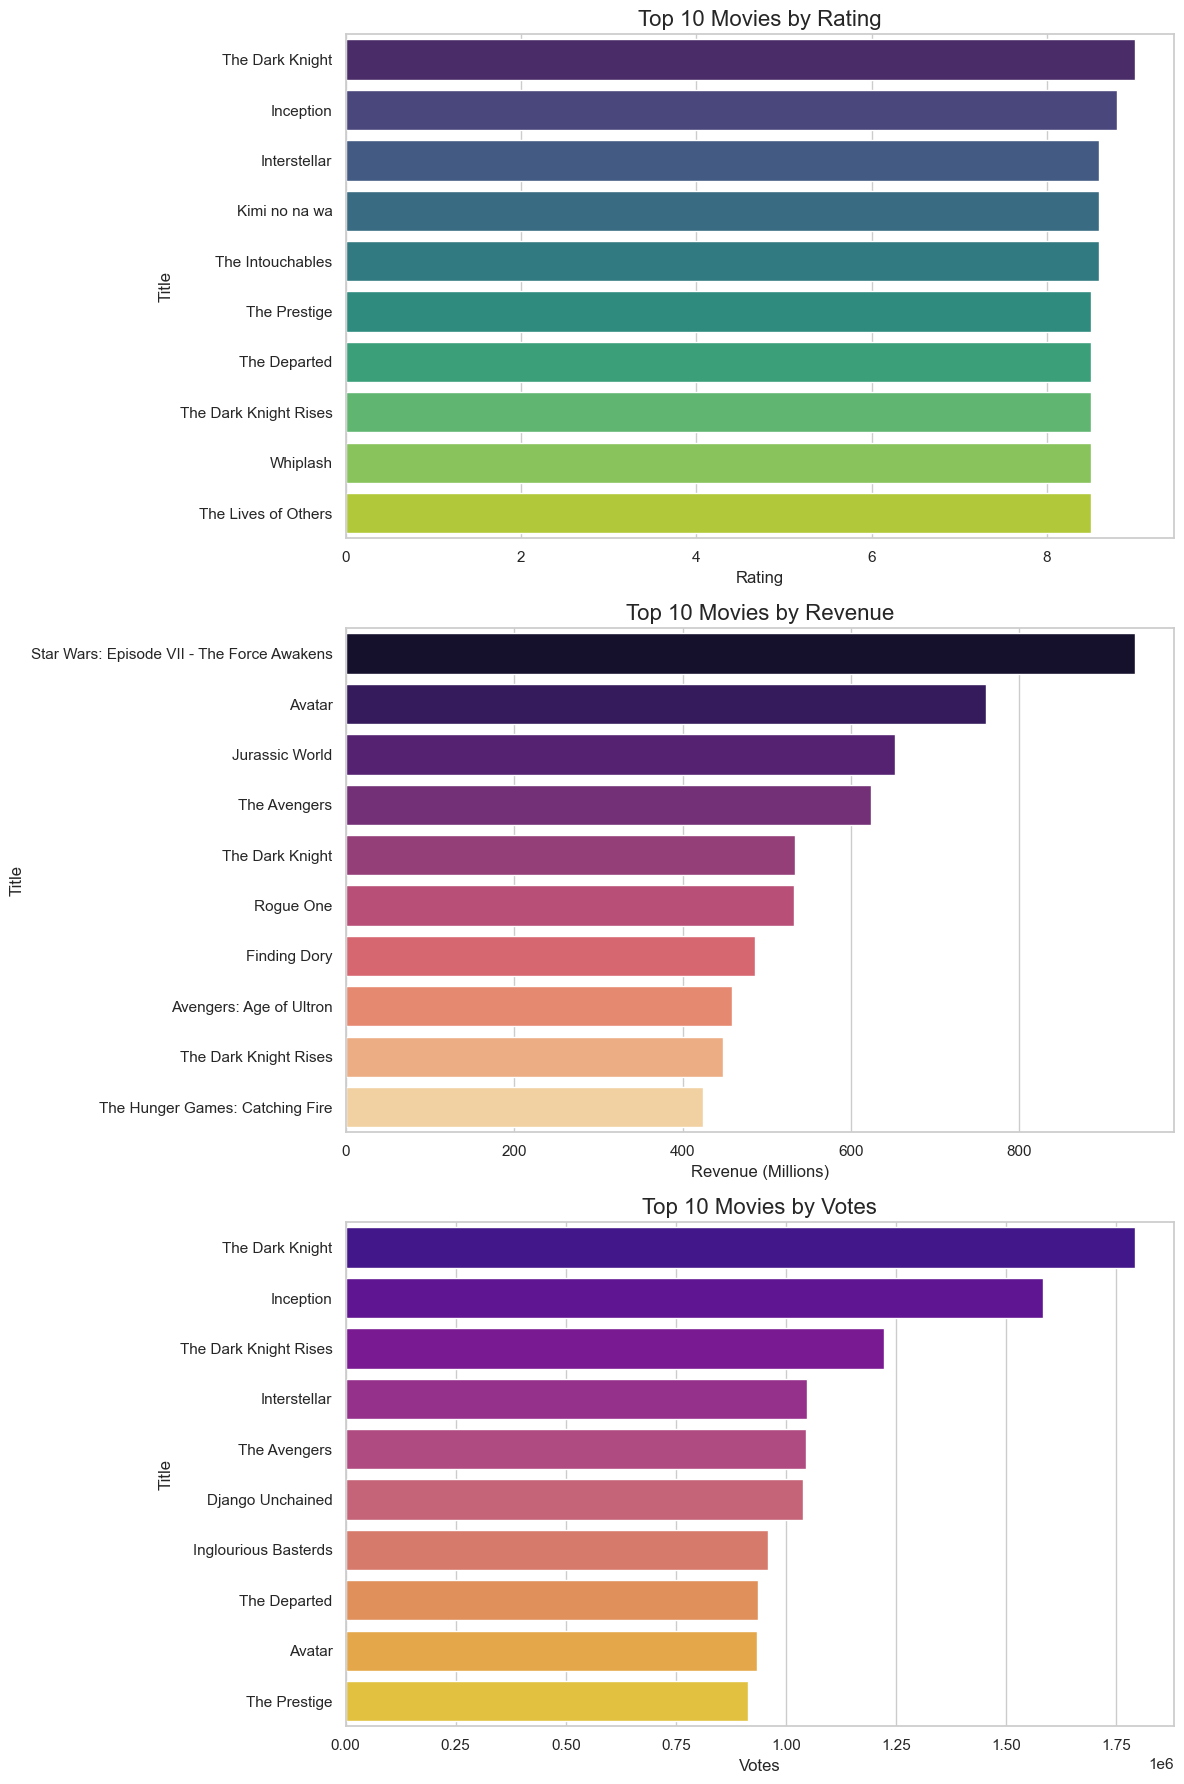

In [327]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Revenue (Millions)'] = pd.to_numeric(df['Revenue (Millions)'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

top_rating = df.nlargest(10, 'Rating')
top_revenue = df.nlargest(10, 'Revenue (Millions)')
top_votes = df.nlargest(10, 'Votes')

sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x='Rating', y='Title', data=top_rating, ax=axs[0], palette='viridis', hue='Title', dodge=False)
axs[0].set_title('Top 10 Movies by Rating', fontsize=16)

sns.barplot(x='Revenue (Millions)', y='Title', data=top_revenue, ax=axs[1], palette='magma', hue='Title', dodge=False)
axs[1].set_title('Top 10 Movies by Revenue', fontsize=16)

sns.barplot(x='Votes', y='Title', data=top_votes, ax=axs[2], palette='plasma', hue='Title', dodge=False)
axs[2].set_title('Top 10 Movies by Votes', fontsize=16)

plt.tight_layout()
plt.show()



### 1. **Top 10 Movies by Rating**:
 ###  - "The Dark Knight" directed by Christopher Nolan has the highest rating (9.0).
  ### - Other highly rated movies include "Inception" (8.8) and "Interstellar" (8.6).

### 2. **Top 10 Movies by Revenue**:
  ### - Star Wars ep7

### 3. **Top 10 Movies by Votes**:
  ### - The dark knight

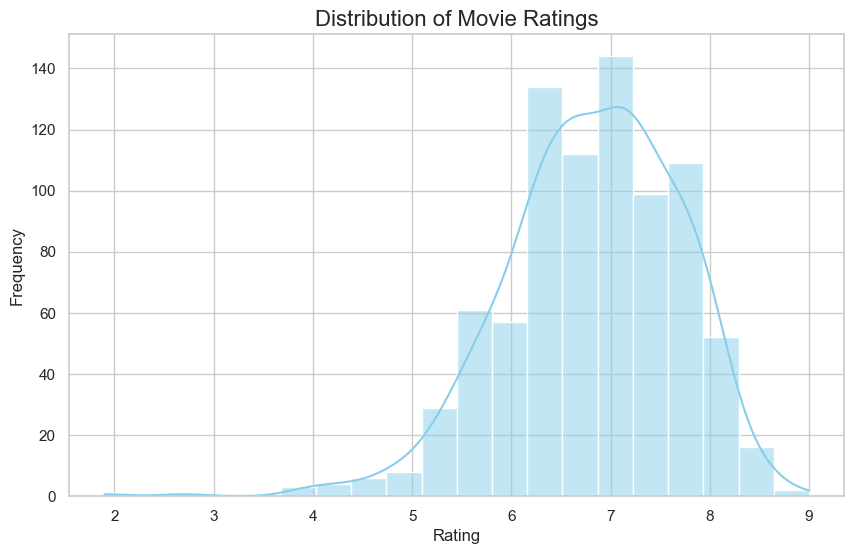

In [329]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### - The chart represents the distribution of movie ratings.
### - Most movies fall within the rating range of 6 to 7.
### - The distribution follows a normal pattern, with the peak occurring around the same point where the histogram bars are tallest.

### In essence, this chart shows that moderate ratings (around 6 to 7) are more common than very high or very low ratings.


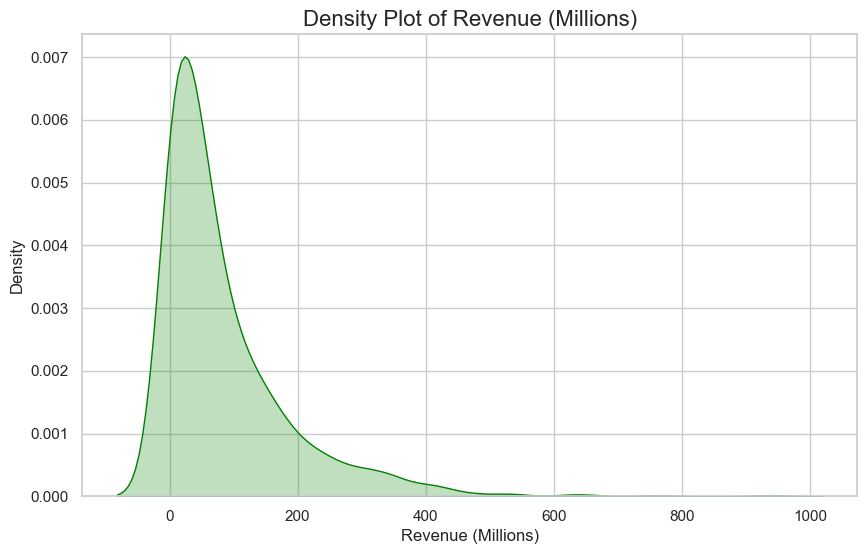

In [333]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Revenue (Millions)'], fill=True, color='green')
plt.title('Density Plot of Revenue (Millions)', fontsize=16)
plt.xlabel('Revenue (Millions)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


### - Most movies fall within the rating range of 6 to 7.
### - The distribution follows a normal pattern, with the peak occurring around the same point where the histogram bars are tallest.

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

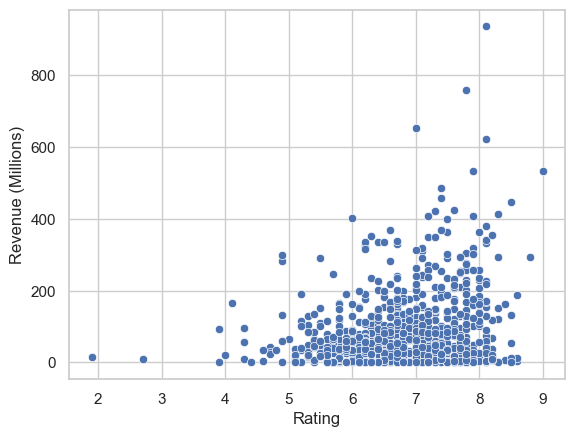

In [335]:
sns.scatterplot(x = 'Rating' , y = 'Revenue (Millions)', data = df)

### Movies with higher ratings tend to perform better financially

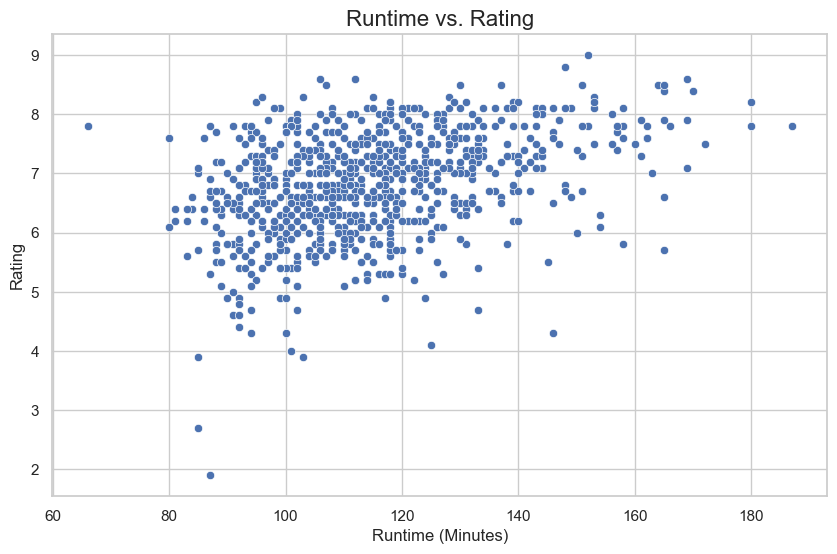

In [337]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=df)
plt.title('Runtime vs. Rating', fontsize=16)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()


### Runtime doesnt affect movie ratings

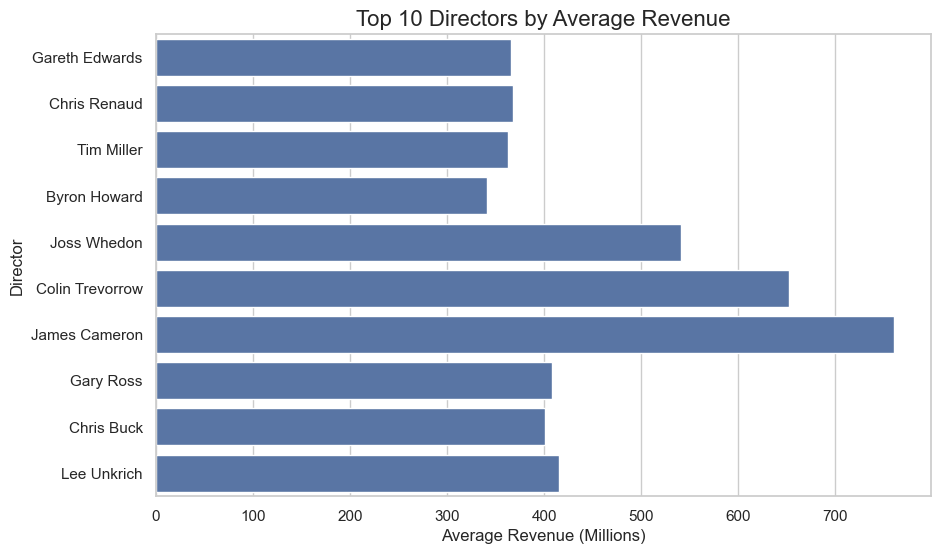

In [339]:
plt.figure(figsize=(10, 6))
top_directors = df.groupby('Director')['Revenue (Millions)'].mean().nlargest(10).index
sns.barplot(x='Revenue (Millions)', y='Director', data=df[df['Director'].isin(top_directors)], errorbar=None)
plt.title('Top 10 Directors by Average Revenue', fontsize=16)
plt.xlabel('Average Revenue (Millions)', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()


---

## Time-Based Trends

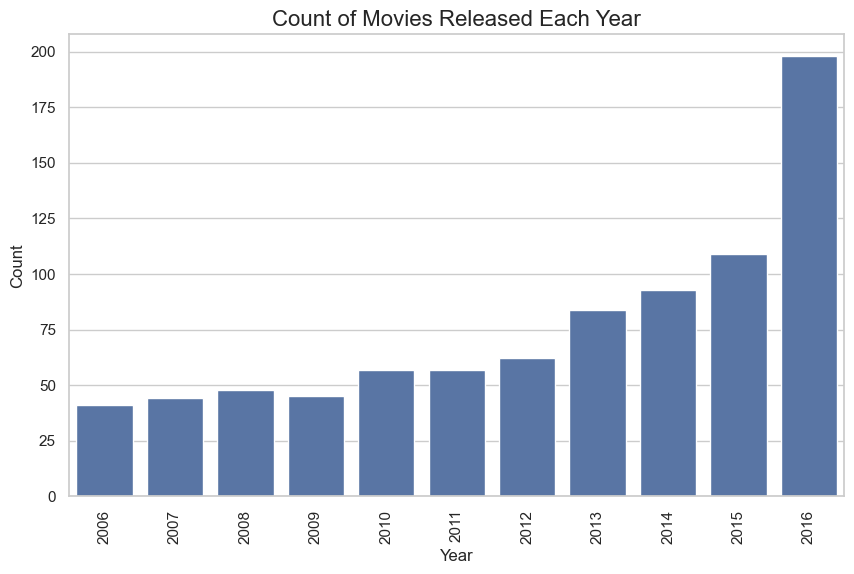

In [342]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.title('Count of Movies Released Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


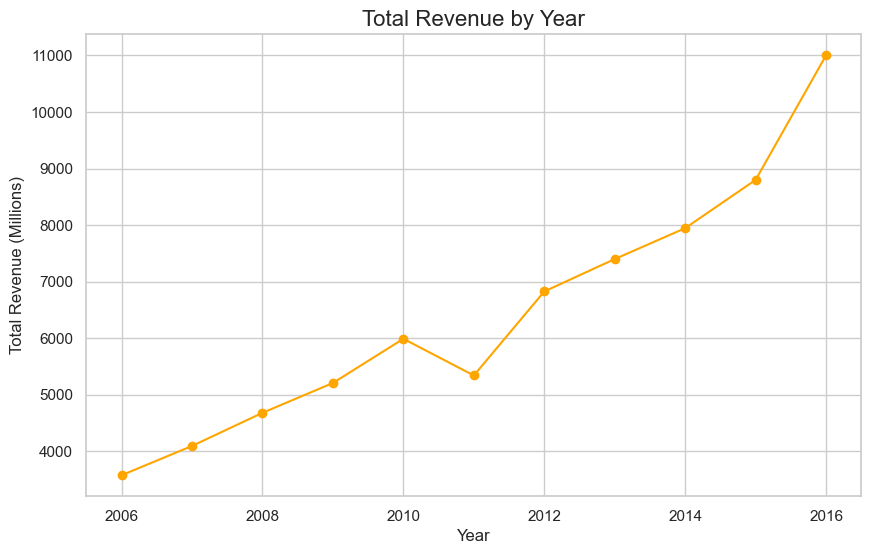

In [343]:
# Plot the relationship between Year and Revenue
plt.figure(figsize=(10, 6))
df.groupby('Year')['Revenue (Millions)'].sum().plot(kind='line', marker='o', color='orange')
plt.title('Total Revenue by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (Millions)', fontsize=12)
plt.show()


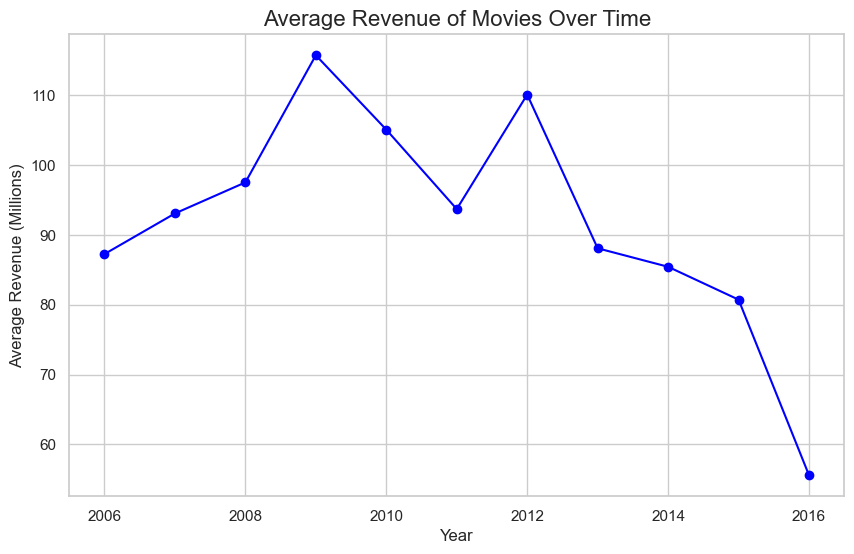

In [344]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Revenue (Millions)'].mean().plot(kind='line', marker='o', color='blue')
plt.title('Average Revenue of Movies Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Revenue (Millions)', fontsize=12)
plt.show()


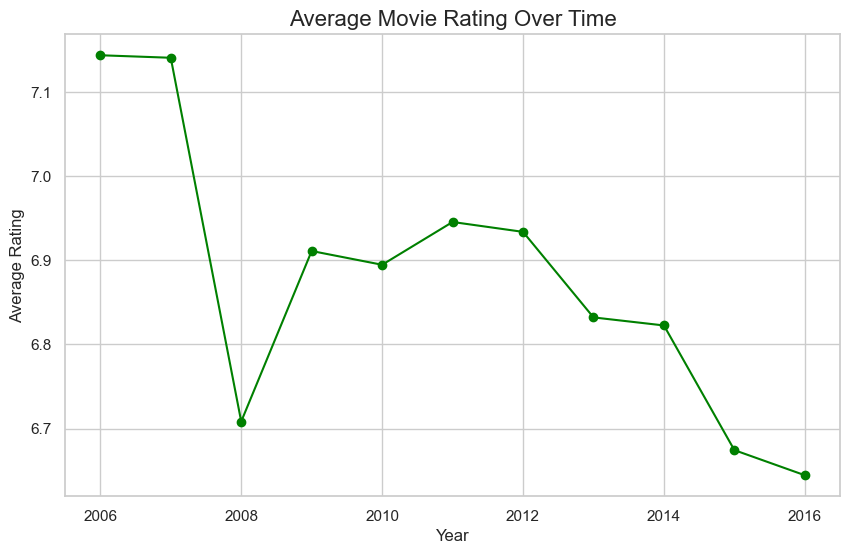

In [345]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Rating'].mean().plot(kind='line', marker='o', color='green')
plt.title('Average Movie Rating Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()


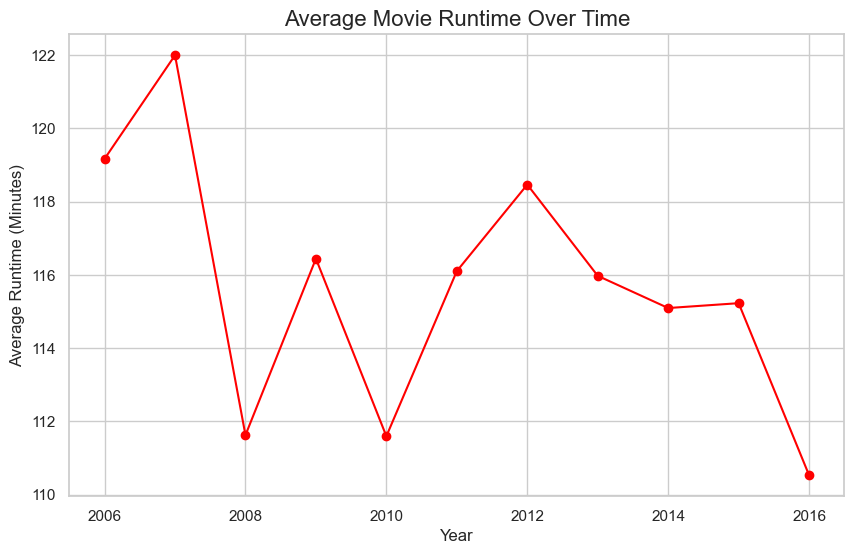

In [346]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Runtime (Minutes)'].mean().plot(kind='line', marker='o', color='red')
plt.title('Average Movie Runtime Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Runtime (Minutes)', fontsize=12)
plt.show()


### While the total number of movies released and their total revenue has gone up over the years, their average rating, runtime and revenue has declined significantly